# Face Recognition


> Recognize and manipulate faces from Python or from the command line with the world’s simplest face recognition library. Built using **```dlib```**’s state-of-the-art face recognition built with deep learning. The model has an accuracy of 99.38% on the Labeled Faces in the Wild benchmark.

> This also provides a simple face_recognition command line tool that lets you do face recognition on a folder of images from the command line!



useful link: http://face-recognition.readthedocs.io/en/latest/readme.html#installing-on-mac-or-linux


## Install ```dlib```  from github

- Clone the code from github:  
```
$ git clone https://github.com/davisking/dlib.git 
```

- Build the main ```dlib``` library:  
```
$ cd dlib
$ mkdir build; cd build; cmake .. -DDLIB_USE_CUDA=0 -DUSE_AVX_INSTRUCTIONS=1; cmake --build .
```

- Build and install the Python extensions:  
```
$ cd ..
$ python3 setup.py install --yes USE_AVX_INSTRUCTIONS --no DLIB_USE_CUDA
```

## Install ```Face Recognition``` on Ubuntu

```
$ sudo pip install face_recognition
```

```
Collecting face_recognition  
  Downloading face_recognition-1.0.0-py2.py3-none-any.whl  
Collecting Click>=6.0 (from face_recognition)  
  Downloading click-6.7-py2.py3-none-any.whl (71kB)  
    100% |████████████████████████████████| 71kB 997kB/s   
Requirement already satisfied: scipy>=0.17.0 in /usr/local/lib/python2.7/dist-packages (from face_recognition)  
Collecting dlib>=19.5 (from face_recognition)  
Requirement already satisfied: Pillow in /usr/local/lib/python2.7/dist-packages (from face_recognition)   
Collecting face-recognition-models>=0.2.0 (from face_recognition)    
Requirement already satisfied: numpy in /usr/local/lib/python2.7/dist-packages (from face_recognition)  
Requirement already satisfied: olefile in /usr/local/lib/python2.7/dist-packages (from Pillow->face_recognition)  
Installing collected packages: Click, dlib, face-recognition-models, face-recognition  
Successfully installed Click-6.7 dlib-19.9.0 face-recognition-1.0.0 face-recognition-models-0.3.0  
```

## Command-Line Interface
When you install **```face_recognition```**, you get a simple command-line program called **```face_recognition```** that you can use to recognize faces in a photograph or folder full for photographs.  

You simply run the command **```face_recognition```**, passing in the folder of known people and the folder (or single image) with unknown people and it tells you who is in each image:  

```
$ face_recognition known/ unknown/

unknown/u-03.jpg,rf-003  
unknown/u-03.jpg,rf-002  
unknown/u-03.jpg,rf-001  
unknown/u-02.jpg,rn-002  
unknown/u-02.jpg,rn-003  
unknown/u-02.jpg,rn-001  
unknown/u-04.jpg,rf-003  
unknown/u-04.jpg,rf-002  
unknown/u-04.jpg,rf-001  
unknown/u-01.jpg,rn-002  
unknown/u-01.jpg,rn-003  
unknown/u-01.jpg,rn-001  
```

## **face_recognition** usage
```
$ face_recognition --help  
Usage: face_recognition [OPTIONS] KNOWN_PEOPLE_FOLDER IMAGE_TO_CHECK  
  
Options:  
  --cpus INTEGER           number of CPU cores to use in parallel (can speed  
                           up processing lots of images). -1 means "use all in  
                           system"  
  --tolerance FLOAT        Tolerance for face comparisons. Default is 0.6.  
                           Lower this if you get multiple matches for the same  
                           person.  
  --show-distance BOOLEAN  Output face distance. Useful for tweaking tolerance  
                           setting.  
  --help                   Show this message and exit.  
```

In [43]:
import face_recognition

# Roger Federer photo
known_image = face_recognition.load_image_file('face-image-test/known/rf-001.jpg')
face_encoding = face_recognition.face_encodings(known_image)[0] # encoding only the first face image

# face_encoding now contains a universal 'encoding' of facial features 
# that can be compared to any other picture of a face!

print("face_encoding", type(face_encoding))
print("shape", face_encoding.shape)

print face_encoding

('face_encoding', <type 'numpy.ndarray'>)
('shape', (128,))
[ -1.58909082e-01   6.91454411e-02   1.78858079e-02  -1.20691136e-01
  -1.00083821e-01   9.60472971e-03  -2.24975981e-02  -4.71106917e-03
   1.49579003e-01   2.32005492e-03   2.50674069e-01   4.71358113e-02
  -2.44552627e-01  -4.27841246e-02  -6.80786185e-03   1.10772058e-01
  -1.53658286e-01  -7.50264525e-02  -1.52736485e-01  -7.40826875e-02
   4.24725469e-03   6.90302104e-02   1.40688187e-02  -1.35573298e-02
  -1.75510556e-01  -2.80921161e-01  -5.82362041e-02  -1.49193943e-01
   1.58115067e-02  -1.61126792e-01   3.24952640e-02   2.62681618e-02
  -1.71425998e-01  -9.38895866e-02   5.49438596e-02   2.04788148e-03
  -5.22167608e-02  -7.49068260e-02   1.77749440e-01  -1.41089056e-02
  -1.20096959e-01   5.16221300e-02   1.10758677e-01   2.60060489e-01
   1.95515931e-01   3.11867893e-02   3.74493301e-02  -1.06458940e-01
   9.94707346e-02  -3.11289936e-01   1.23887986e-01   9.32022706e-02
   6.90958947e-02   6.15166426e-02   1.3316

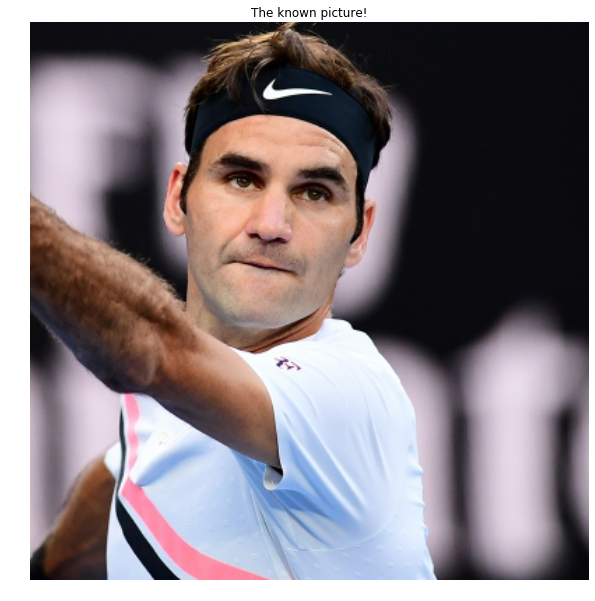

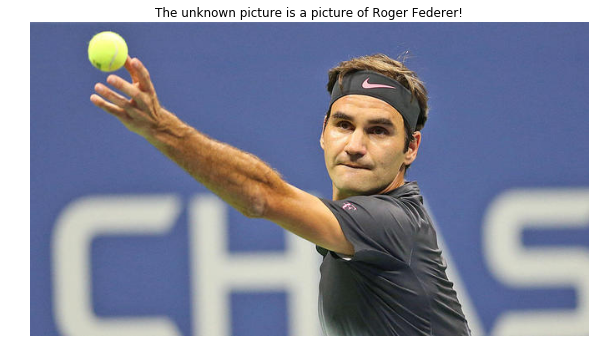

In [50]:
unknown_image = face_recognition.load_image_file('face-image-test/unknown/u-03.jpg')
unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0] # encoding only the first face image

plt.figure(figsize=(10,10))
plt.imshow(np.asarray(known_image))
plt.title("The known picture!")
plt.axis('off')
plt.show()

# Now we can see the two face encodings are of the same person with `compare_faces`!
results = face_recognition.compare_faces([face_encoding], unknown_face_encoding)

if results[0] == True:    
    plt.figure(figsize=(10,10))
    plt.imshow(np.asarray(unknown_image))
    plt.title("The unknown picture is a picture of Roger Federer!")
    plt.axis('off')
    plt.show()
else:
    plt.figure(figsize=(10,10))
    plt.imshow(np.asarray(unknown_image))
    plt.title("The unknown picture is not a picture of Roger Federer!")
    plt.axis('off')
    plt.show()